In [28]:
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold # 计算方差
import matplotlib.pyplot as plt
from scipy.stats import pearsonr    # 计算相关系数
from sklearn.feature_extraction import DictVectorizer

In [29]:
data = pd.read_csv("data.csv",encoding="gbk")
# 人工去除无用特征、特征过滤
data = data.drop(["is_high_user","student_feature","Unnamed: 0","custid","trade_no","bank_card_no","source","id_name"],axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 82 columns):
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility                             4752 non-null float64
repayment_capability                          4754 non-null int64
number_of_trans_from_2011                     4752 non-null float64
first_transaction_time                        4752 non-null float64
historical_tr

In [30]:
# 时间处理?
def deal_time(t):
    try:
        t = datetime.datetime.strptime(str(int(t)),"%Y%M%d")
        t = t.strftime("%Y-%M-%d")
    except:
        pass
    return t

data['first_transaction_time']=pd.to_datetime(data['first_transaction_time'].apply(lambda x:deal_time(x)))
data['latest_query_time']=pd.to_datetime(data['latest_query_time'])
data['loans_latest_time']=pd.to_datetime(data['loans_latest_time'])
data.loc[:,'first_transaction_time_year']=data['first_transaction_time'].apply(lambda x : x.year)
data.loc[:,'first_transaction_time_month']=data['first_transaction_time'].apply(lambda x : x.month)
data.loc[:,'first_transaction_time_day']=data['first_transaction_time'].apply(lambda x : x.day)
# data.loc[:,'latest_query_time_year']=data['latest_query_time'].apply(lambda x : x.year)
data.loc[:,'latest_query_time_month']=data['latest_query_time'].apply(lambda x : x.month)
data.loc[:,'latest_query_time_day']=data['latest_query_time'].apply(lambda x : x.day)
# data.loc[:,'loans_latest_time_year']=data['loans_latest_time'].apply(lambda x : x.year)
data.loc[:,'loans_latest_time_month']=data['loans_latest_time'].apply(lambda x : x.month)
data.loc[:,'loans_latest_time_day']=data['loans_latest_time'].apply(lambda x : x.day)
data.drop(["first_transaction_time","latest_query_time","loans_latest_time"],axis=1,inplace=True)

<BarContainer object of 86 artists>

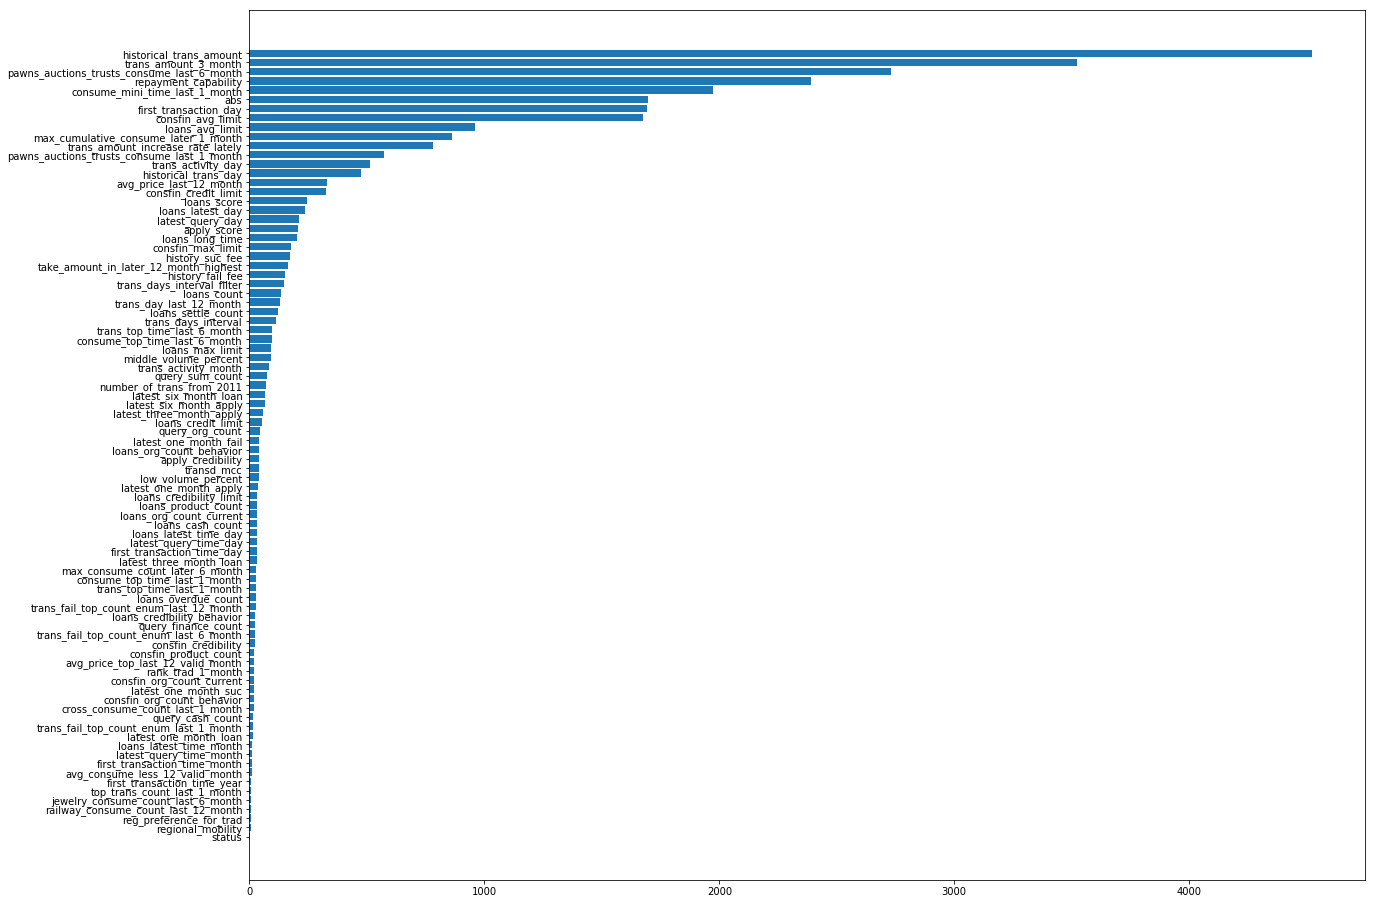

In [31]:
# 查看每一列种类数量
plt.figure(figsize=(20,16))
view_list = sorted([[column,data[column].value_counts().shape[0]] for column in data.columns],key=lambda x:x[1],reverse=False)
plt.barh([x[0] for x in view_list],[x[1] for x in view_list])

In [32]:
# null值替换
for column in data.columns:
    if data[column].dtype in ["float64","int64"]:
        data[column].fillna(data[column].mean(),inplace=True)
    else:
        print(column,data[column].dtype)
data.dropna(inplace=True)
for column in data.columns:
    if column !="reg_preference_for_trad":
        a = pearsonr(data[column],data["status"])
        print(column,a)
data.drop(["take_amount_in_later_12_month_highest","trans_amount_increase_rate_lately","transd_mcc","trans_days_interval_filter",
           "jewelry_consume_count_last_6_month","latest_six_month_apply","loans_credibility_behavior","loans_latest_time_day",
           "first_transaction_time_day","first_transaction_time_month"],axis=1,inplace=True)

reg_preference_for_trad object
low_volume_percent (0.05184638367799074, 0.0003495831827515573)
middle_volume_percent (0.041132277136005396, 0.004569711369795451)
take_amount_in_later_12_month_highest (-0.0017462382457247951, 0.9042099191109163)
trans_amount_increase_rate_lately (-0.009371806762322717, 0.5183522833686953)
trans_activity_month (0.016952328224289482, 0.24265309375842178)
trans_activity_day (-0.020670568594023605, 0.1542445599396564)
transd_mcc (-0.00011004223362708664, 0.993949110178141)
trans_days_interval_filter (-0.006511829512949481, 0.6535917999427697)
trans_days_interval (0.01702054589215716, 0.24076236170489237)
regional_mobility (-0.03523864325557028, 0.015128739274127907)
repayment_capability (-0.012410975219543771, 0.39235444888304916)
number_of_trans_from_2011 (-0.04499540886815009, 0.0019189185363096923)
historical_trans_amount (-0.033501763216071796, 0.020917159181801384)
historical_trans_day (-0.03880211149704356, 0.007470303791228713)
rank_trad_1_month (0.1

In [33]:
# 切分数据集
x_train,x_test,y_train,y_test = train_test_split(data.drop("status",axis=1),data["status"],random_state=2018,test_size=0.3)

# 把其中的非数字型转为one-hot
x_train = x_train.to_dict(orient="records")
x_test = x_test.to_dict(orient="records")
trans = DictVectorizer()
x_train = trans.fit_transform(x_train)
x_test = trans.transform(x_test)

# 标准化
trans = StandardScaler(with_mean=False)
x_train = trans.fit_transform(x_train)
x_test = trans.transform(x_test)